# Sentiment Analysis of Yelp Reviews - Exploratory Data Analysis

#### Prepared By: Ben Chamblee

## Contents

* [Introduction](#Introduction)  
* [Review Metrics](#Review_Metrics)
* [Removing Stop Words](#Removing_Stop_Words)
* [Other Review Filtering Methods](#Other_Rev)
* [Word Clouds](#Word_Clouds)
* [Stemming and Lemmatization](#Stem_and_Lem)
* [Positive Opinion Lexicon](#Positive_Op)
* [Word Count Matrix](#WCM)
* [Polarity and Subjectivity](#Pols)
* [Polarity and Positive Word Percentage](#PolPos)
* [Conclusion](#Conclusion)


## Introduction

Now that we've got all our data we're going to take a closer look and see if we can find a trend or pattern that might be helpful when designing our model. We're also going to begin applying some natural langauge processing techniques like stemming and stop word removals so that we can begin to analyze what these reviews are really trying to say

## Objectives

Explore the data and visualize any patterns or new findings

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yelp_data = pd.read_csv('yelp_reviews_dataset.csv')
yelp_data_unpacked = pd.read_csv('yelp_data_unpacked.csv')

import warnings
warnings.filterwarnings('ignore')

## Review Metrics<a id='Review_Metrics'></a>

In [2]:
yelp_data_unpacked.head()

,Alias,Name,Rating,Price,City,Zip_code,Address,Review
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...


The first metric we're going to look at is the word count for each review

In [3]:
yelp_data_unpacked['Review_Word_Count'] = yelp_data_unpacked['Review'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

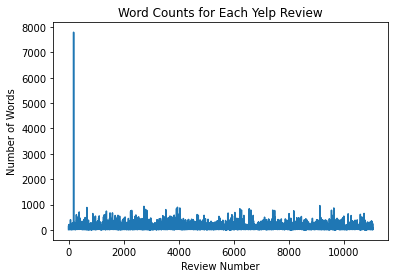

In [4]:
yelp_data_unpacked['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

Looks like most reviews are under 1000 words except for one outlier, let's take a look at that one

In [5]:
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count
184,riviera-caterers-brooklyn,Riviera Caterers,4.5,NaN,Brooklyn,11224,2780 Stillwell Ave,'Got a question about Riviera Caterers? Ask th...,7791


In [6]:
long_review = yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]['Review'][184]
long_review

'\'Got a question about Riviera Caterers? Ask the Yelp community!, I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy and ease to work with Adam, Tommy, and their staff. A true diamond in the rough of Coney Island and the best value out there for Brooklyn weddings! Extremely recommend this place.First, the space has been recently remodeled and it is truly gorgeous and modern. You dont have to worry about bringing in much of your own decorations - our florals, ceremony, table settings, and photos looked stunning against the Rivieras backdrop.The service of the Riviera staff was also impeccable. Up to the wedding, they were responsive and helpful and kind. During our wedding, the staff took extreme care of us and our guests, and over-checked on us every step of the way. I felt very taken care of. At the end of the night, waiters had trays of water waiting for everyone as they headed home from the party. They even put champagne in the bathroom

As far as I can tell this is really just a very passionate customer who had a great time at this restaurant, I read through parts of the review and search for any duplicate text and couldn't find anything

The phrase "'\'Got a question about Riviera Caterers? Ask the Yelp community!, " showed up a lot so I'll filter that out now, but luckily this is just a really long review and not a web scraping error or anything

In [7]:
new_i = str(long_review).replace('Got a question about Riviera Caterers? Ask the Yelp community!,','')   

In [8]:
yelp_data_unpacked = yelp_data_unpacked.replace(long_review,new_i)

In [9]:
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]['Review'][184][0:100]

"' I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy a"

Problem fixed! If you have the time I reccomend reading through this review, this person clearly had an amazing time with this catering company

Next we'll look at the character count, which isn't as important as the word count but could still be a useful metric to have for the analysis

In [10]:
yelp_data_unpacked['Review_Char_Count'] = yelp_data_unpacked['Review'].apply(lambda x: len(str(x)))

## Removing Stop Words<a id='Removing_Stop_Words'></a>

Stop words like 'the', 'a', 'for', or 'so' don't really have much meaning for sentiment analysis. Removing them is an important step to imrprove overall efficiency and make the overall meaning of each review easier to understand with less filler.

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


Now we can apply this to our reviews dataset, first we're going to add some more columns to make the analysis easier, one column will be for lowercase reviews and the other will be for lowercase and no punctuation

In [12]:
yelp_data_unpacked['Lowercase'] = yelp_data_unpacked['Review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [13]:
yelp_data_unpacked['Cleaned'] = yelp_data_unpacked['Lowercase'].str.replace('[^\w\s]', '')

In [14]:
Reviews_noStopWords = []

for i in range(len(yelp_data_unpacked)):
    
    review = str(yelp_data_unpacked['Cleaned'][i])
    review = review
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

In [15]:
yelp_data_unpacked['No_Stop_Words:Tokens'] = Reviews_noStopWords

In [16]:
yelp_data_unpacked['No_Stop_Words:Sentence'] = Reviews_noStopWords
for i in range(len(yelp_data_unpacked)): 
    text_list = yelp_data_unpacked['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    yelp_data_unpacked['No_Stop_Words:Sentence'][i] = blank

Now lets see how many words from the original review are stop words

In [17]:
Stop_Word_Count = []
for i in range(len(yelp_data_unpacked)):
    review = str(yelp_data_unpacked['Review'][i]).lower()
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

yelp_data_unpacked['Stop_Word_Count'] = Stop_Word_Count

We could plot this but I believe it will look similar to the word count plot due to that 8000 word review, let's calculate the percentage of stop words instead and plot that

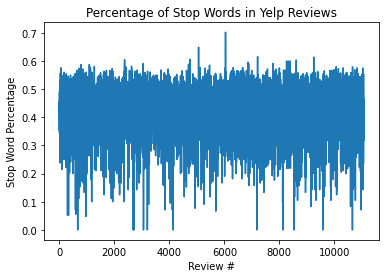

In [18]:
full = yelp_data_unpacked['Review_Word_Count']
partial = yelp_data_unpacked['Stop_Word_Count']

yelp_data_unpacked['Stop_Words_%'] = partial/full
yelp_data_unpacked['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Stop Word Percentage');

Looks like most reviews are around 45% stop words, lets look at that one outlier near 70% though

In [19]:
yelp_data_unpacked[yelp_data_unpacked['Stop_Words_%'] > 0.65]['Review'][6043]

"'I have been coming to this restaurant for years. I am so happy to see that it is still here after all we have been through with Covid. If you have not been here you should be. It has great good. The soup is sooo very good."

Looks like a normal review, lets take a look at the other extreme where the reviews are near 0% stop words

In [20]:
yelp_data_unpacked[yelp_data_unpacked['Stop_Words_%'] < 0.05]['Review'][4136]

"'Awesome cheap food! Good Ambience decently priced drinks"

This person used 0 stop words in their review, impressive!

## Other Review Filtering Methods<a id='Other_Rev'></a>

Stop words are a good first step when removing words with no meaning, but lets take a look at all our text and see if there are any words that are frequently repeated

In [21]:
pd.Series(''.join(yelp_data_unpacked['No_Stop_Words:Sentence']).split()).value_counts()[:20]

food          6735
place         6203
good          5777
great         4404
like          3984
service       3603
one           3520
time          3122
get           3069
back          2967
go            2729
would         2720
really        2666
bar           2591
also          2538
restaurant    2448
ordered       2308
us            2268
got           2195
came          2180
dtype: int64

Out of over 10,000 reviews, all of these words don't even appear once per review so we'll keep them in. Especially the words like 'good' and 'great': these are very important to hold onto

if a word like 'restaurant' had over 10,000 appearances (more than once per review on average) I would have gotten rid of it, but these shouldn't make a significant impact

## Word Clouds<a id='Word_Clouds'></a>

Now that we don't have stop words we can generate a word cloud that won't have any filler words - this will make the more frequently used words that have meaning stand out more as opposed to seeing only stop words

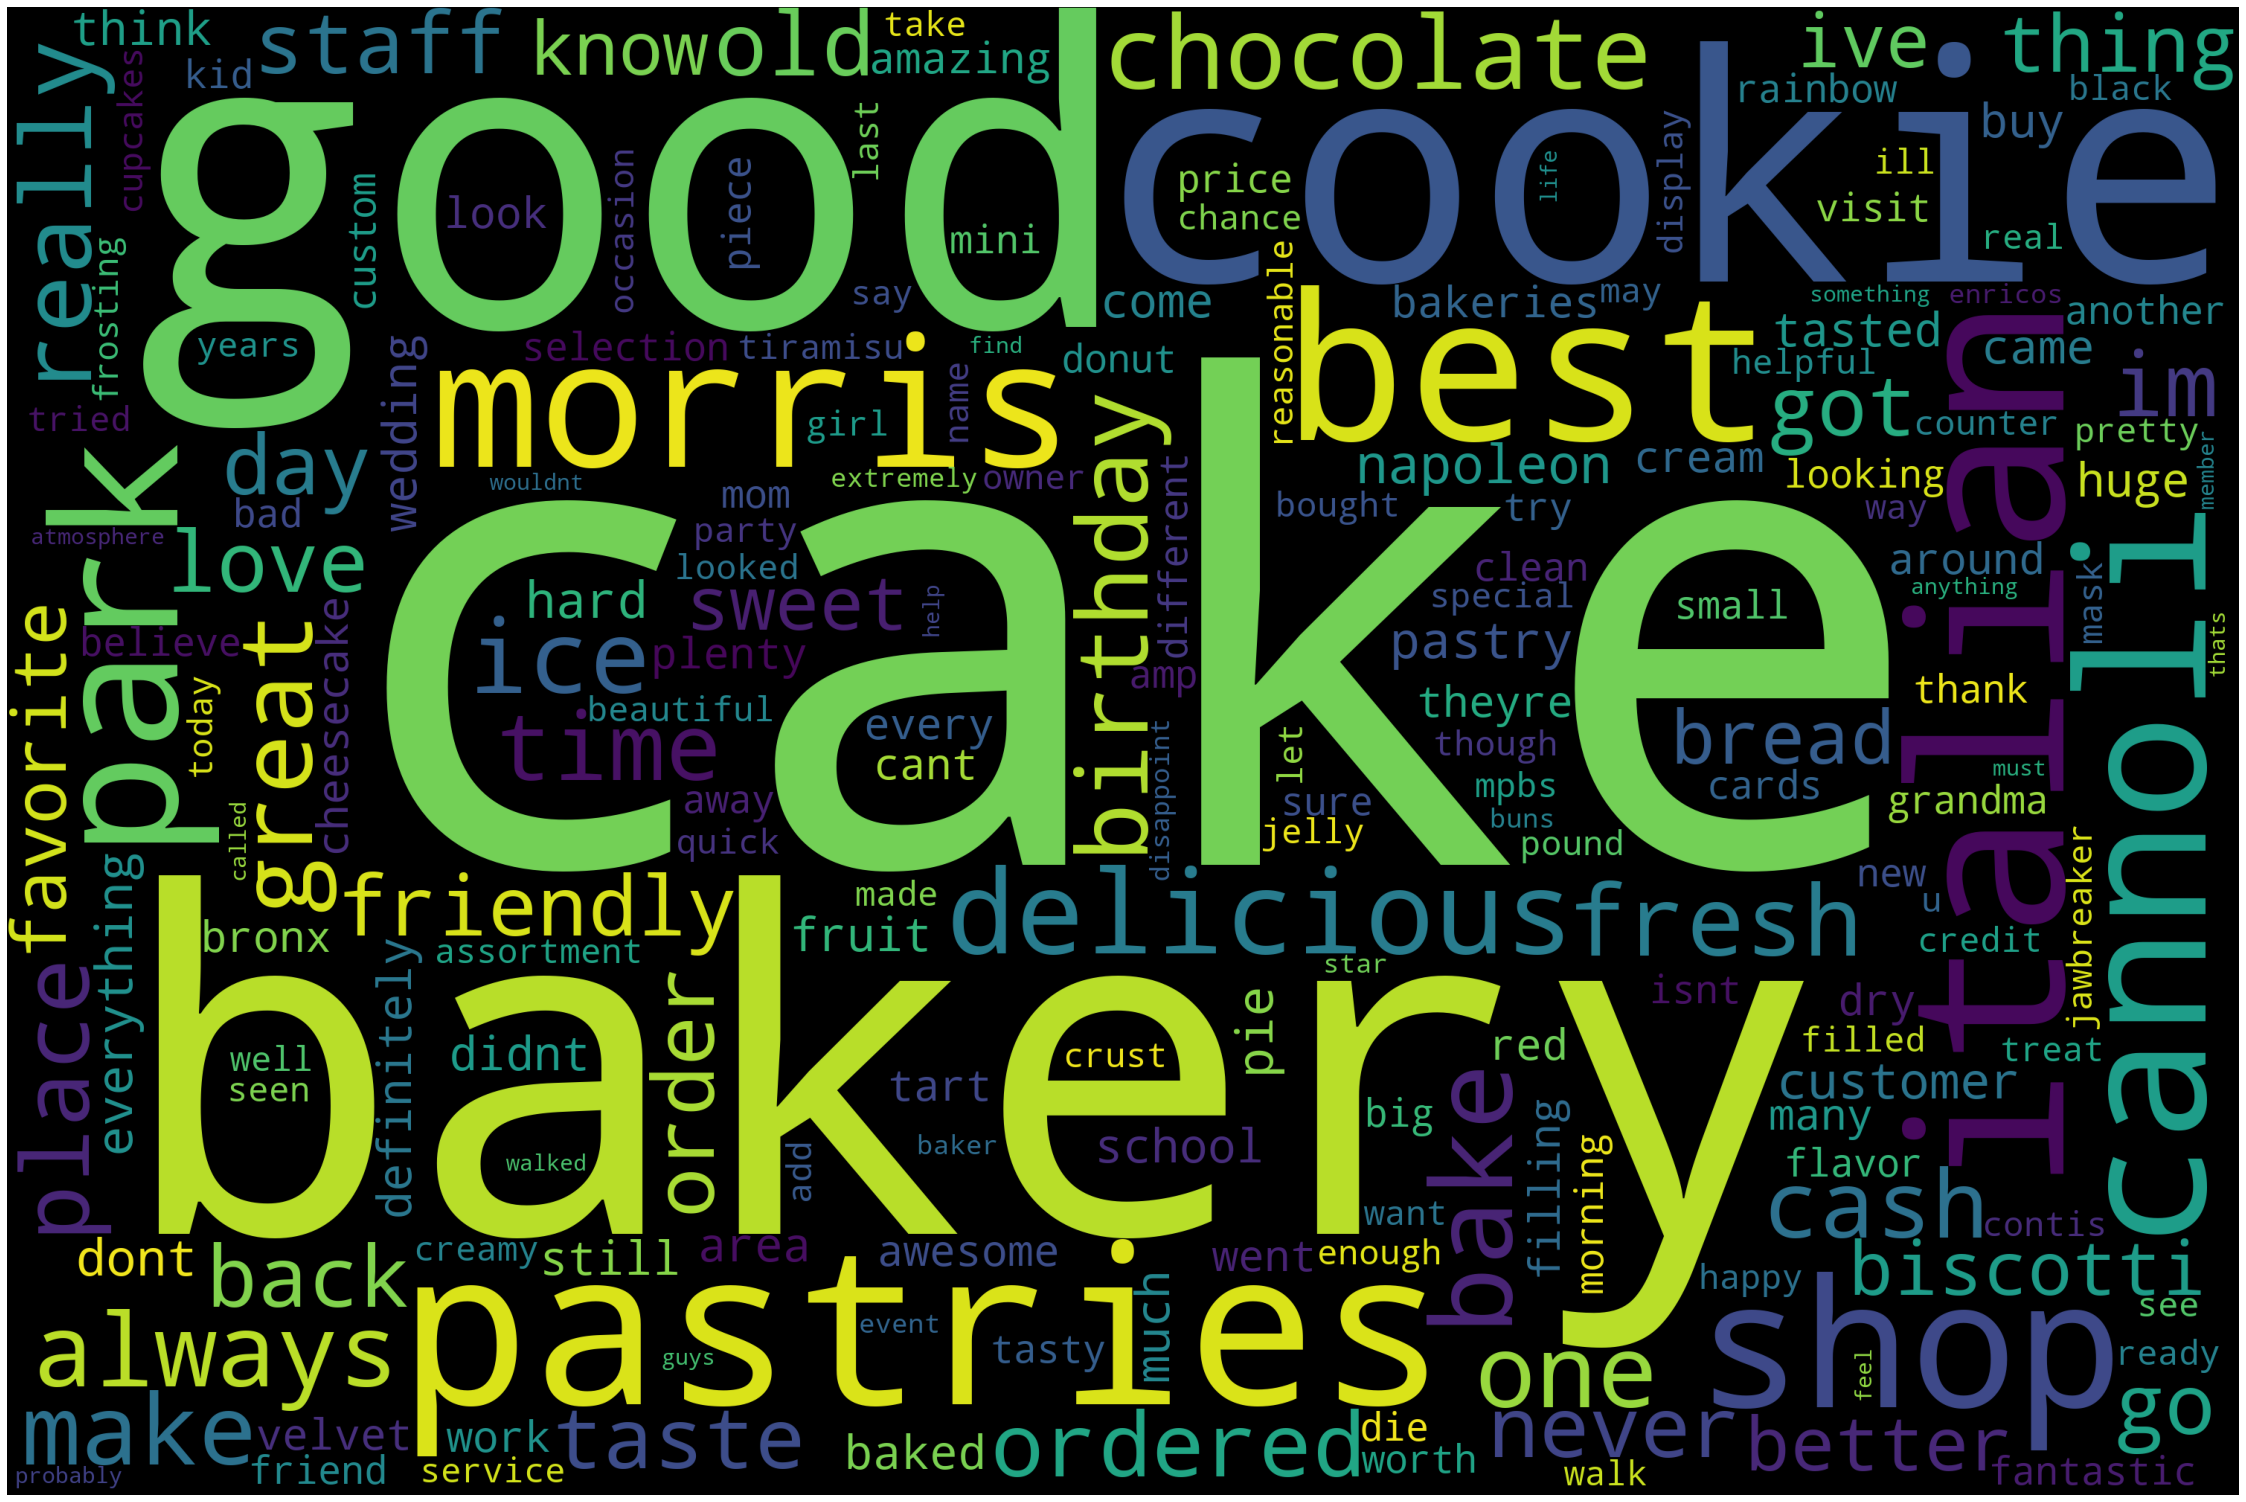

In [22]:
def get_all_text(location):
    all_words = ''
    for i in range(len(yelp_data_unpacked['Name'])):
        if yelp_data_unpacked['Name'][i] == location:
            words = yelp_data_unpacked['No_Stop_Words:Tokens'][i]
            blank = ''
            for word in words:
                blank = blank+' '+word
            all_words = all_words + ' '+blank
            
    return all_words


text = get_all_text("Morris Park Bake Shop")

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(text)
plot_cloud(wordcloud)

The sentiment looks pretty positive based on my first impression!

## Stemming and Lemmatization<a id='Stem_and_Lem'></a>

Stemming is an important part of Natural Language Processing, it basically removes all the suffixes from each word variety and leaves the root word. For example:
- Flying becomes Fly after removing the 'ing'
- Waited becomes Wait after removing the 'ed'
- Beauty becomes Beautiful after changing the 'y' to 'i' and adding 'ful'

and vice versa, this makes the reviews have less unique words which will help when we're counting the frequency of sentiment words

There are many methods of stemming, but the method that I believe makes the most sense for this analysis is the Snowball Stemmer, which is an improved version of the popular Porter Stemmer

Lemmatization makes sure that each word is consistently formatted but unlike stemming it doesn't make the text unreadable, for this reason I'll be make a column for both

In [23]:
import textblob
from textblob import Word

In [24]:
yelp_data_unpacked['Lemmatized'] = yelp_data_unpacked['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [25]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = yelp_data_unpacked['Lemmatized'][40]
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print(sentence)
print('')
print(stemmed)

awesome bake shop huge variety pastry mini cake ordered napoleon chocolate mouse black white cookie black white cookie bit dry however napoleon chocolate mouse amazing napoleon different one normally bakery usually theyre filled sum kinda bavaraian eclair type cream one filled taste like vanilla pudding great mini cake 150 piece 3 piece put scale price extremely reasonable well

awesom bake shop huge varieti pastri mini cake order napoleon chocol mous black white cooki black white cooki bit dri howev napoleon chocol mous amaz napoleon differ one normal bakeri usual theyr fill sum kinda bavaraian eclair type cream one fill tast like vanilla pud great mini cake 150 piec 3 piec put scale price extrem reason well


Now we can tokenize these stemmed sentences

In [26]:
import re
def word_extraction(sentence):   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [27]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(yelp_data_unpacked)):
    sentence = yelp_data_unpacked['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [28]:
yelp_data_unpacked['Stemmed:Sentence'] = stemmed_list

In [29]:
for i in range(len(yelp_data_unpacked)):
    stemmed = yelp_data_unpacked['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [30]:
yelp_data_unpacked['Stemmed:Tokens'] = stemmed_tokens_list

In [31]:
yelp_data_unpacked['Stemmed:Tokens'][1]

['morri',
 'park',
 'bake',
 'shop',
 'becom',
 'go',
 'spot',
 'atmospher',
 'place',
 'great',
 'invit',
 'love',
 'everi',
 'thing',
 'order',
 'staff',
 'realli',
 'pleasant',
 'definit',
 'help',
 'anyth',
 'definit',
 'come',
 'back',
 'morri',
 'park',
 'bake',
 'shop']

In [34]:
yelp_data_unpacked['Stemmed_Word_Count'] = yelp_data_unpacked['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))

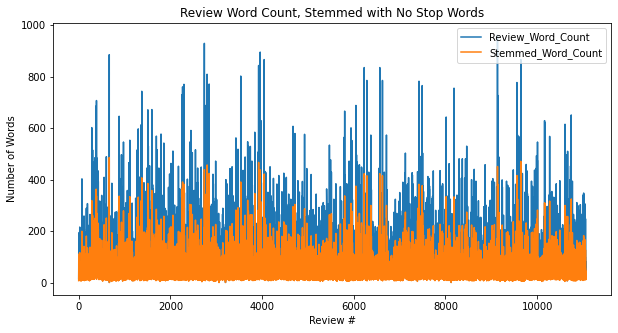

In [35]:
plt.figure(figsize=(10,5))
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
yelp_data_unpacked[yelp_data_unpacked['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

Stemming makes a significant impact when it comes to total word count, especially on those longer reviews

## Positive Opinion Lexicon<a id='Positive_Op'></a>

Thanks to https://github.com/shekhargulati/sentiment-analysis-python/blob/master/opinion-lexicon-English/positive-words.txt We're able to create a positive opinion lexicon based on words commonly associated with positive sentiment. This list includes the words you would expect like 'good', 'great' and so on, but also common misspellings and phrases on social media. Using this lexicon we can count how many words within a review are also in the lexicon - this should give us an idea of which reviews are the most positive

In [36]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lex = content.splitlines()
pos_lex_stem = [snowBallStemmer.stem(word) for word in pos_lex]

In [37]:
good_count = []
for i in range(len(yelp_data_unpacked)):
    count = 0
    tokens = yelp_data_unpacked['Stemmed:Tokens'][i]
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    good_count.append(count)

In [38]:
yelp_data_unpacked['Positive_Word_Count'] = good_count

In [39]:
yelp_data_unpacked['Positive_Words_%'] = yelp_data_unpacked['Positive_Word_Count']/(yelp_data_unpacked['Review_Word_Count']-yelp_data_unpacked['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

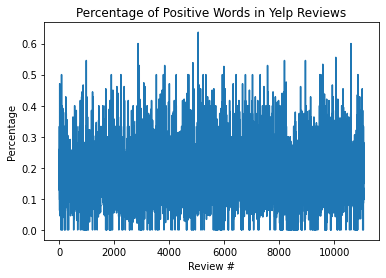

In [40]:
yelp_data_unpacked['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

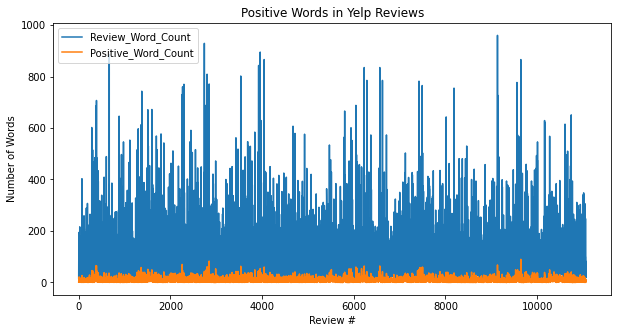

In [41]:
plt.figure(figsize=(10,5))
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
yelp_data_unpacked[yelp_data_unpacked['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

## Word Count Matrix<a id='WCM'></a>

The next step is to make a word matrix, this way we can get a count of how many times an word was used throughout all the reviews for each location. Once we have a count we can begin to point out which words are used the most and what the meaning behind these popular words are

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

def get_all_stemmed_tokens(location):
    all_tokens = []
    for i in range(len(yelp_data_unpacked['Stemmed:Tokens'])):
        if yelp_data_unpacked['Name'][i] == location:
            tokens = yelp_data_unpacked['Stemmed:Tokens'][i]
            all_tokens.append(str(tokens))
            
    return all_tokens

docs = get_all_stemmed_tokens('Morris Park Bake Shop')
vec = CountVectorizer()
X = vec.fit_transform(docs)
word_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [43]:
word_matrix.head()

,11lb,125,13,130,15,150,1st,2018,22,25,...,wrong,year,yesterday,yet,york,your,youv,yum,yummi,yummyfresh
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
word_matrix = word_matrix.append(word_matrix.sum(numeric_only=True), ignore_index=True)

In [45]:
word_matrix = word_matrix.sort_values(by = (len(word_matrix)-1), axis=1, ascending=False)

In [46]:
word_matrix20 = word_matrix.iloc[:, : 20]

In [47]:
morris = word_matrix20.iloc[54]

In [48]:
morris

cake       65
bakeri     32
pastri     30
good       25
cooki      24
bake       22
italian    22
best       20
order      20
cannoli    18
shop       18
morri      18
park       17
delici     17
tast       16
like       16
ice        14
chocol     13
make       13
friend     13
Name: 54, dtype: int64

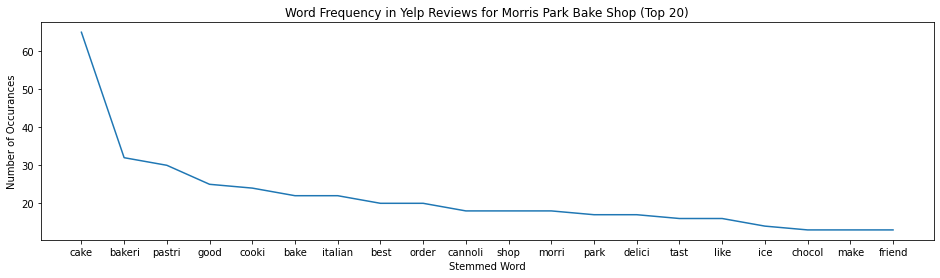

In [49]:
plt.figure(figsize=(16,4))
plt.title('Word Frequency in Yelp Reviews for Morris Park Bake Shop (Top 20)')
plt.xlabel('Stemmed Word')
plt.ylabel('Number of Occurances')
plt.plot(morris)

As you can see among some of the top words are 'good', 'best', 'delici', and 'great' implying that this place probably has a very positive sentiment, and given that the average rating is at 4.5/5 stars this makes perfect sense!

In [50]:
def get_word_frequency_graph(index):

    docs = get_all_stemmed_tokens(yelp_data_unpacked['Name'].unique()[index])
    vec = CountVectorizer()
    X = vec.fit_transform(docs)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    df = df.sort_values(by = (len(df)-1), axis=1, ascending=False)
    df20 = df.iloc[:, : 20]
    x = df20.iloc[len(df20)-1]
    plt.figure(figsize=(16,4))
    plt.title('Word Frequency in Yelp Reviews for '+ yelp_data_unpacked['Name'].unique()[index] + ' (Top 20)')
    plt.xlabel('Stemmed Word')
    plt.ylabel('Number of Occurances')
    plt.plot(x)

Morris Bake Shop had a rating of 4.5, lets see what the word frequency chart looks like for a place with a lower rating

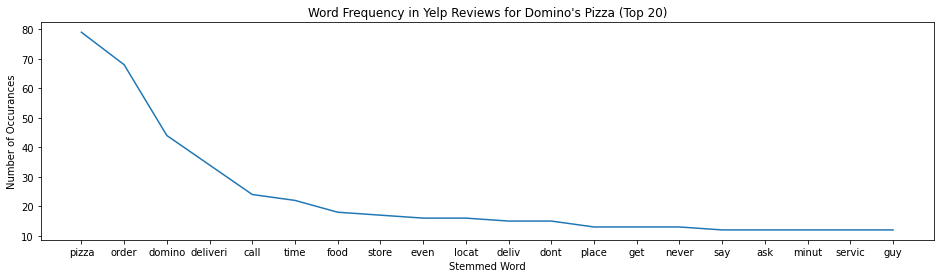

In [51]:
bad_review = list(yelp_data_unpacked[yelp_data_unpacked['Rating'] < 2.5]['Name'])[0]
bad_index = list(yelp_data_unpacked['Name'].unique()).index(bad_review)

get_word_frequency_graph(bad_index)

As you can see, there aren't a lot of positive words, but there aren't many objectively negative words either. Sure you could say that 'dont' or 'never' are bad, but what if in context the reviewer is saying something like 'You don't want to miss this place' or 'I'll never forget the amazing food I had there'. We'll have to keep this in mind when creating our model

## Polarity and Subjectivity<a id='Pols'></a>

TextBlob has a very useful library that can determine the Polarity(-1,1) and Subjectivity(0,1) from text. For this project, the polarity is really the only useful one, as it will help us classify the reviews we're working with now and help train for the model, but subjectiveness could be interesting to look into as well

In [52]:
from textblob import TextBlob

In [53]:
yelp_data_unpacked['Polarity'] = yelp_data_unpacked['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
yelp_data_unpacked['Subjectivity'] = yelp_data_unpacked['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

So does this word, let's test with the example of a restaurant with bad reviews like the Domino's we used for an example above. With all these negative reviews it should have a polarity well below 0

In [54]:
pol = yelp_data_unpacked[yelp_data_unpacked['Name'] == bad_review]['Polarity'].mean()
pol

-0.49720139828174764

In this case, the average polarity matches up with the overall rating for this restaurant, perhaps if you don't have any positive words in your top 20 it has a big impact on the overall sentiment?

## Polarity and Positive Word Percentage<a id='PolPos'></a>

Let's see if there is a relationship between the percentage of positive words in a review and its polarity. I'll be doing this by soring the data into three sets:
- Polarity < 0: Meaning these reviews should be negative and, therofore have a lower positive words percentage
- Polarity > 0: Where the percentage of positive words SHOULD go up
- Polarity = 0: Where the sentiment should be neutral, so the percentage should be in between the other

In [55]:
df1 = yelp_data_unpacked[yelp_data_unpacked['Polarity'] < 0]
df2 = yelp_data_unpacked[yelp_data_unpacked['Polarity'] > 0]
df3 = yelp_data_unpacked[yelp_data_unpacked['Polarity'] == 0]

df1 = df1.sort_values(by='Polarity')
df2 = df2.sort_values(by='Polarity')
df3 = df3.sort_values(by='Polarity')

df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

df3.index=np.arange(len(df1),(len(df1)+len(df3)))
df2.index=np.arange((len(df3)+len(df1)),(len(df1)+len(df3)+len(df2)))

In [56]:
df4 = yelp_data_unpacked
df4 = df4.sort_values(by='Polarity')

Text(0, 0.5, 'Positive Word Percentage')

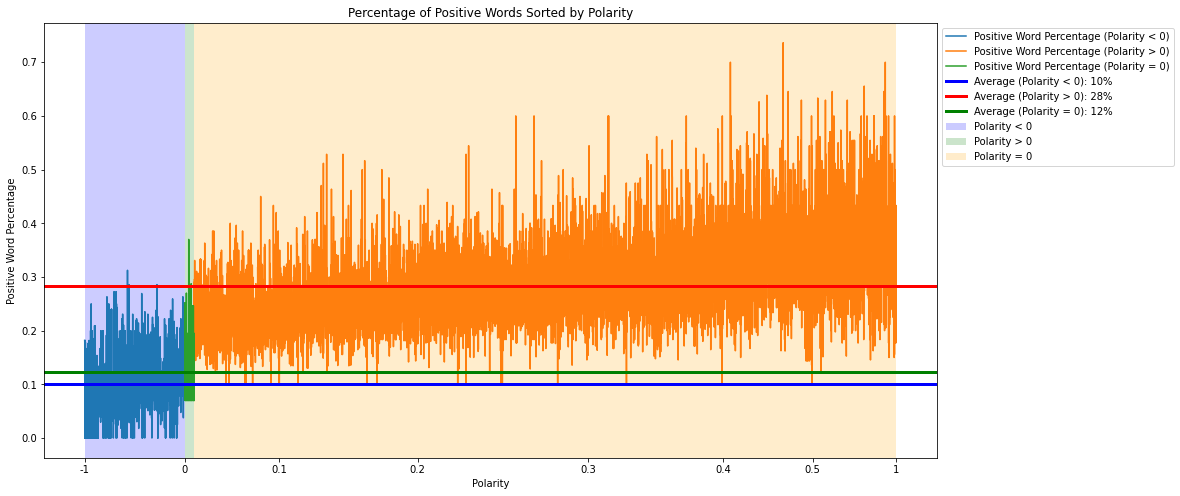

In [57]:
import matplotlib.transforms as transforms


# set up figure
fig, ax = plt.subplots(figsize=(16,8))

x = yelp_data_unpacked.index

# set x axis for partial plots
x1 = df1.index
y1 = df1['Positive_Words_%']
x2 = df2.index
y2 = df2['Positive_Words_%']
x3 = df3.index
y3 = df3['Positive_Words_%']

# calculate average for each partial
av1 = df1['Positive_Words_%'].mean()
av2 = df2['Positive_Words_%'].mean()
av3 = df3['Positive_Words_%'].mean()

# plot word percentage
plt.plot(x1,y1,label='Positive Word Percentage (Polarity < 0)')
plt.plot(x2,y2,label='Positive Word Percentage (Polarity > 0)')
plt.plot(x3,y3,label='Positive Word Percentage (Polarity = 0)')

# plot area to define polarity zones
plt.axvspan(0,len(df1), facecolor='blue', alpha=0.2,label='Polarity < 0')
plt.axvspan(len(df1),(len(df1)+len(df3)), facecolor='green',alpha=0.2,label='Polarity > 0')
plt.axvspan((len(df1)+len(df3)),(len(df1)+len(df3)+len(df2)), facecolor='orange',alpha=0.2, label='Polarity = 0')

# plot average lines
plt.axhline(y=av1,linewidth=3, color='b',label='Average (Polarity < 0): '+str(av1)[2:4]+'%')
plt.axhline(y=av2,linewidth=3, color='r',label='Average (Polarity > 0): '+str(av2)[2:4]+'%')
plt.axhline(y=av3,linewidth=3, color='g',label='Average (Polarity = 0): '+str(av3)[2:4]+'%')

# label x axis as polarity
labels = ['-1','0','0.1','0.2','0.3','0.4','0.5','1']
ticks = [0,len(df1),2655,4539,6869,8704,9924,11065]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage of Positive Words Sorted by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Positive Word Percentage')

Now as you can see by this plot, there's a significant increase in 'Positive Words Percentage' As the Polarity goes up - so does the percentage of positive words. This seems like it could be very useful when it comes to classifying reviews with our model later on.

## Conclusion

We now have a much better understanding of our data and have several metrics to use while working with these reviews. We know the total number of words, how many of those words are stop words, how many of those words are positive words and how we can use that information, along with polarity to classify the reviews into sentiments. 

Moving forward it'll be good to determine whether or not we want to make multiple categories, like a five star system or to just stick with positive and negative, if we go with the first option we need to figure our where the cutoff for a 4 star vs a 5 star might be among other things. For now though, on to modeling!

In [58]:
yelp_data_unpacked.columns

Index(['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'Review_Char_Count', 'Lowercase',
       'Cleaned', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens', 'Stemmed_Word_Count', 'Positive_Word_Count',
       'Positive_Words_%', 'Polarity', 'Subjectivity'],
      dtype='object')

In [59]:
yelp_data_analyzed = yelp_data_unpacked[['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens', 'Polarity','Positive_Word_Count', 'Positive_Words_%','Stemmed_Word_Count']]

In [60]:
yelp_data_analyzed.to_csv(r'yelp_data_analyzed.csv',index=False)